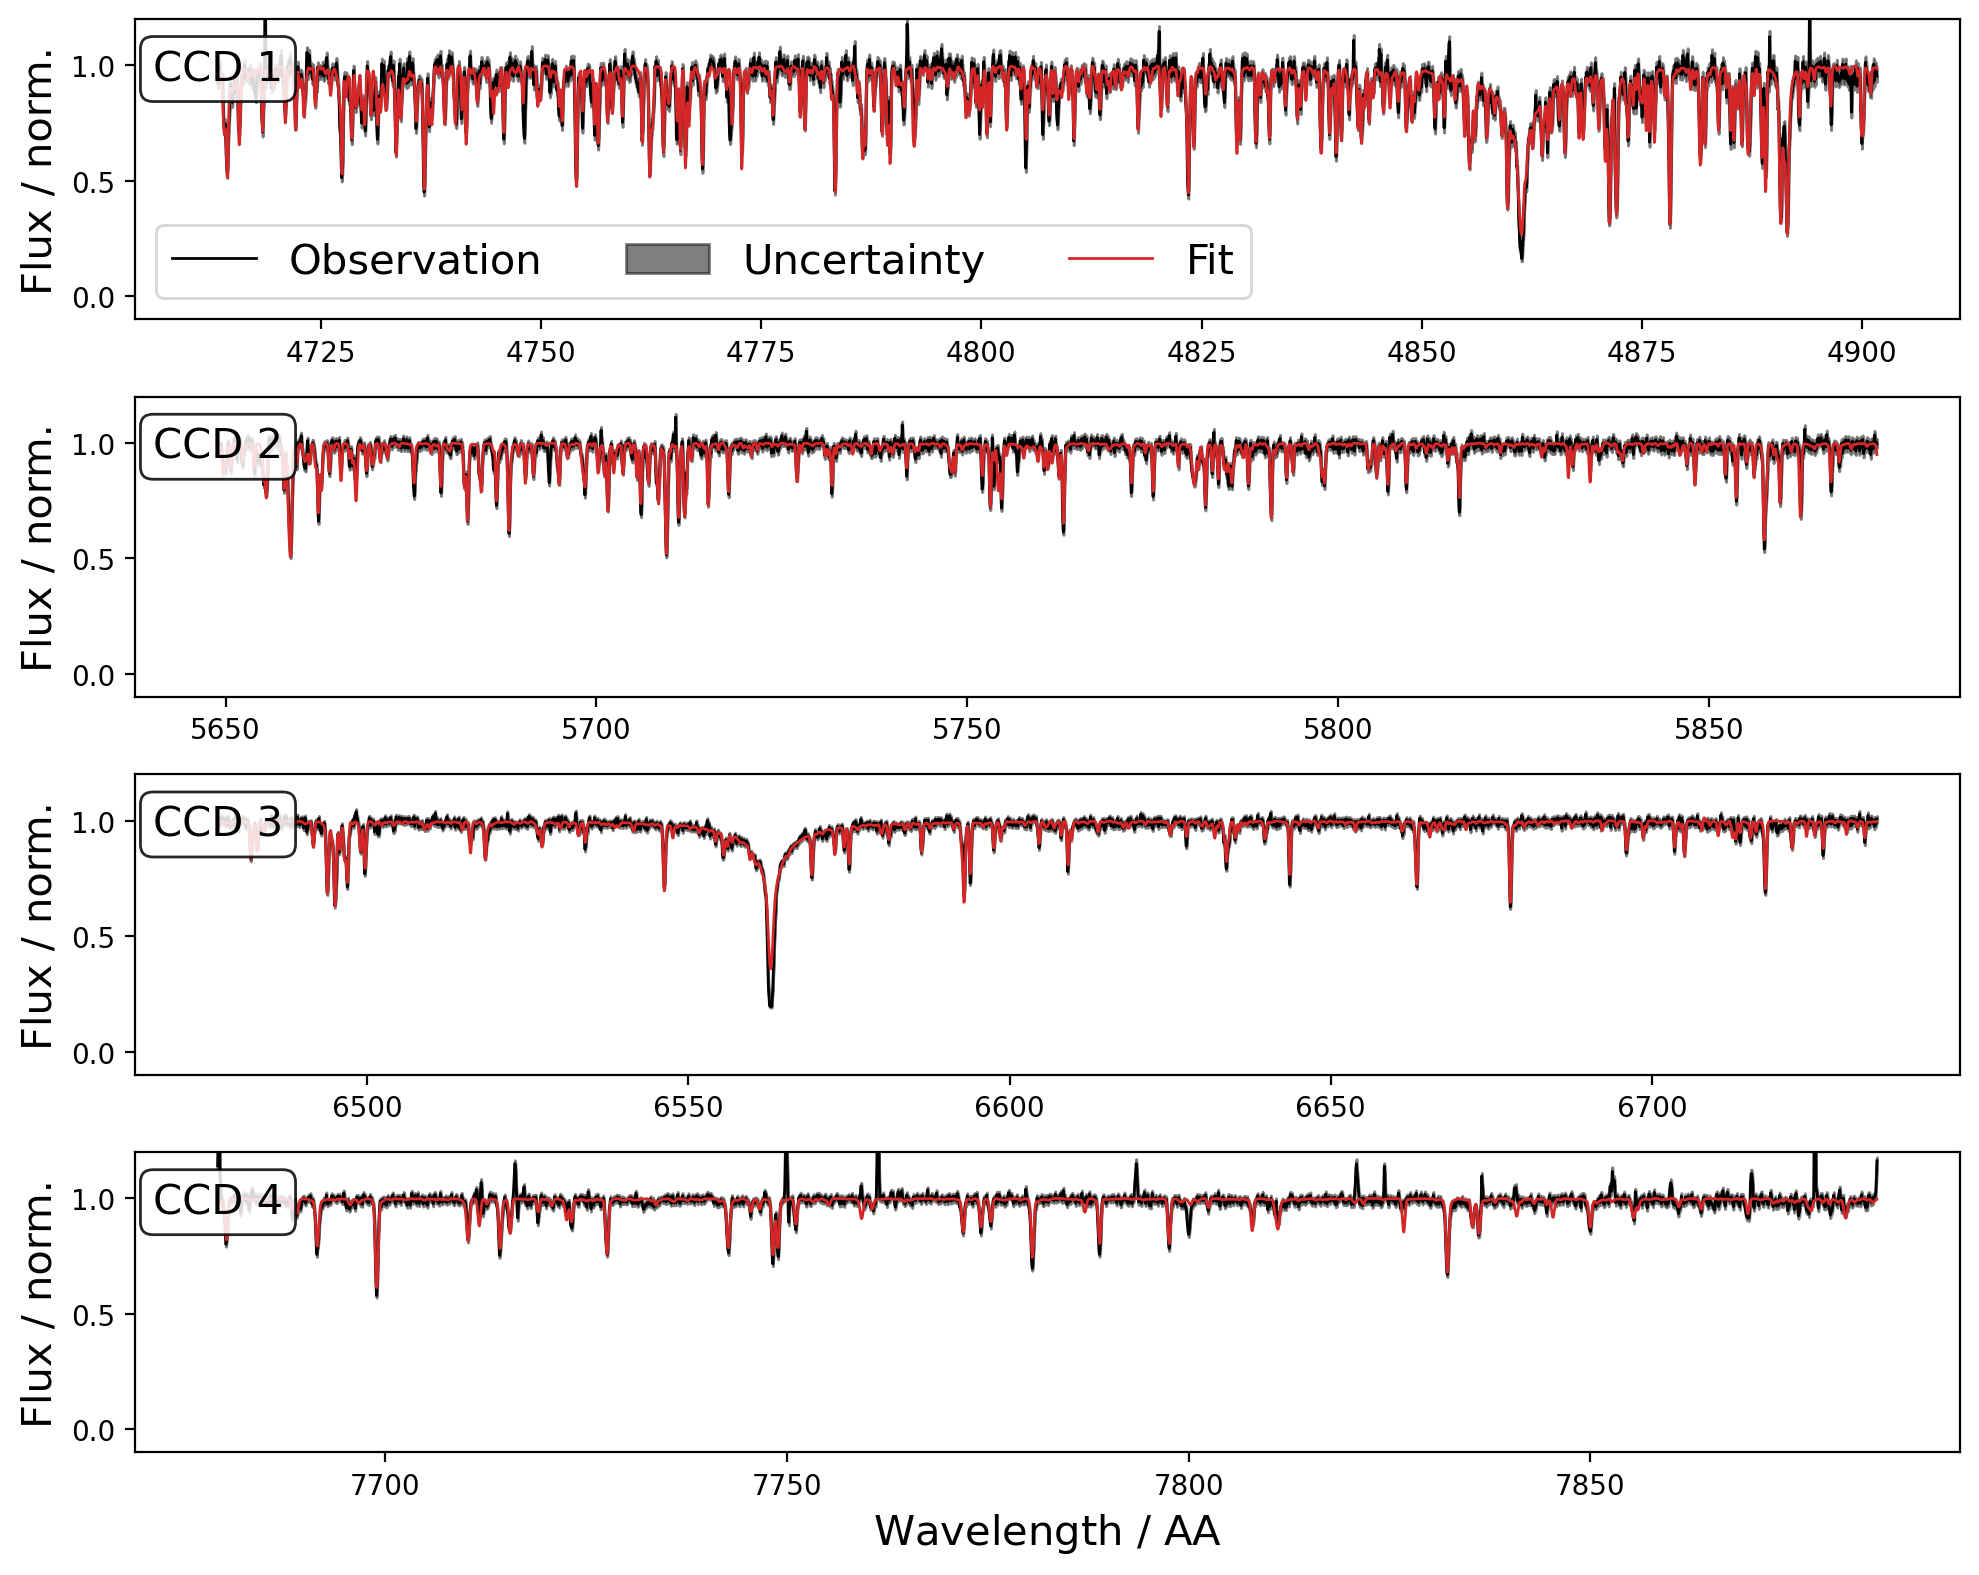

In [53]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
    %config Completer.use_jedi = False
except:
    pass

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table,join
from astropy.io import fits

def plot_spectrum(sobject_id, setup='allstar'):
    """
    Plots the astronomical spectrum for a given object ID and setup.

    Parameters:
    sobject_id (int): The unique identifier for the spectral object.
    setup (str): The setup configuration, defaults to 'allstar'.

    The function attempts to read a FITS file corresponding to the sobject_id and setup,
    extracts the spectral data, and plots the observed and modeled flux across different CCD ranges.
    If the FITS file is not found, it logs an error message.
    """
    
    try:
        # Path to the FITS file
        fits_path = f'spectra/{sobject_id}/{sobject_id}_{setup}_fit_spectrum.fits'
        
        # Use context manager for handling FITS file
        with fits.open(fits_path) as fits_file:
            data = fits_file[1].data
            wavelength = data['wave']
            flux_observed = data['sob']
            flux_uncertainty_observed = data['uob']
            flux_model = data['smod']

    except FileNotFoundError:
        print(f"Error: FITS file not found for sobject_id {sobject_id} and setup {setup}.")
        return
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return

    # Create subplots
    fig, gs = plt.subplots(4, 1, figsize=(10, 8), sharey=True)
    
    for ccd in range(1, 5):
        ax = gs[ccd - 1]

        # Basic info for each CCD panel
        ax.text(0.01, 0.9, f'CCD {ccd}', ha='left', va='top', transform=ax.transAxes, bbox=dict(boxstyle='round', facecolor='w', alpha=0.85), fontsize=15)

        if ccd == 4:
            ax.set_xlabel(r'Wavelength / $\mathrm{AA}$',fontsize=15)
        ax.set_ylabel('Flux / norm.',fontsize=15)

        # Define wavelength range for each CCD
        ccd_start, ccd_end = (ccd + 3) * 1000, (ccd + 4) * 1000
        wavelength_in_ccd = (wavelength > ccd_start) & (wavelength < ccd_end)

        # Plot observed spectrum
        ax.plot(wavelength[wavelength_in_ccd], flux_observed[wavelength_in_ccd],
                c='k', label='Observation', linewidth=1 )

        # Overplot uncertainty region of obseration
        ax.fill_between(
            wavelength[wavelength_in_ccd],
            flux_observed[wavelength_in_ccd]-flux_uncertainty_observed[wavelength_in_ccd],
            flux_observed[wavelength_in_ccd]+flux_uncertainty_observed[wavelength_in_ccd],
            color = 'k', alpha=0.5, label='Uncertainty'
        )

        # Overplot model spectrum
        ax.plot(wavelength[wavelength_in_ccd], flux_model[wavelength_in_ccd],
                c='C3', label='Fit', linewidth=1)

        # Setting legend for the first CCD only
        if ccd == 1:
            ax.legend(fontsize=15,ncol=3)

    # Set y-limits to focus on the relevant part of the spectrum
    ax.set_ylim(-0.1, 1.2)

    plt.tight_layout()
    save_path = f'plots/{sobject_id}_{setup}_spectrum.pdf'
    plt.savefig(save_path, dpi=200, bbox_inches='tight')
    plt.show()

# Example usage
plot_spectrum(140111002601042)

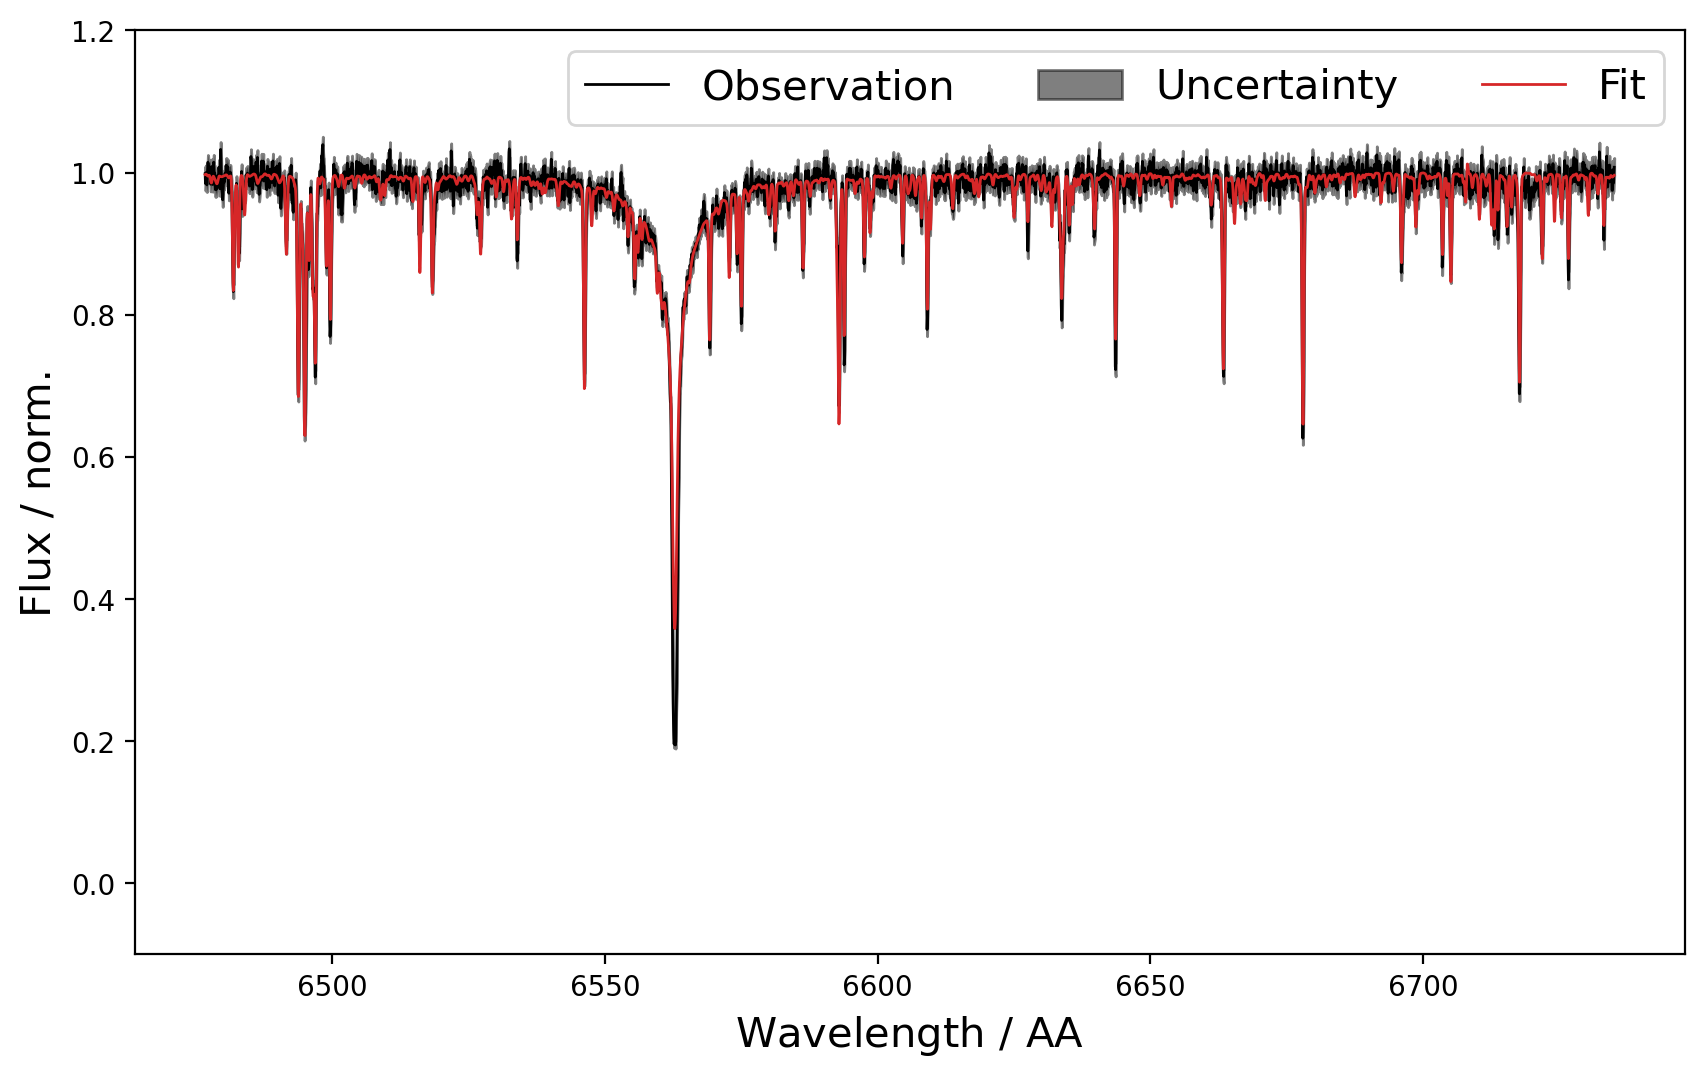

In [54]:
def plot_spectrum_custom_range_single(sobject_id, setup='allstar'):
    """
    Plots the astronomical spectrum for a given object ID and setup within a custom wavelength range.

    Parameters:
    sobject_id (int): The unique identifier for the spectral object.
    setup (str): The setup configuration, defaults to 'allstar'.

    The function attempts to read a FITS file corresponding to the sobject_id and setup,
    extracts the spectral data, and plots the observed and modeled flux within a custom wavelength range.
    If the FITS file is not found, it logs an error message.
    """
    
    try:
        # Path to the FITS file
        fits_path = f'spectra/{sobject_id}/{sobject_id}_{setup}_fit_spectrum.fits'
        
        # Use context manager for handling FITS file
        with fits.open(fits_path) as fits_file:
            data = fits_file[1].data
            wavelength = data['wave']
            flux_observed = data['sob']
            flux_uncertainty_observed = data['uob']
            flux_model = data['smod']

    except FileNotFoundError:
        print(f"Error: FITS file not found for sobject_id {sobject_id} and setup {setup}.")
        return
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return

    # Create a single plot
    plt.figure(figsize=(10, 6))

    # Define custom wavelength range
    custom_range_start, custom_range_end = 6000, 7000
    wavelength_in_range = (wavelength > custom_range_start) & (wavelength < custom_range_end)

    # Plot observed spectrum within the custom range
    plt.plot(wavelength[wavelength_in_range], flux_observed[wavelength_in_range],
             c='k', label='Observation', linewidth=1)

    # Overplot uncertainty region of observation
    plt.fill_between(
        wavelength[wavelength_in_range],
        flux_observed[wavelength_in_range]-flux_uncertainty_observed[wavelength_in_range],
        flux_observed[wavelength_in_range]+flux_uncertainty_observed[wavelength_in_range],
        color='k', alpha=0.5, label='Uncertainty'
    )

    # Overplot model spectrum within the custom range
    plt.plot(wavelength[wavelength_in_range], flux_model[wavelength_in_range],
             c='C3', label='Fit', linewidth=1)

    # Set labels and legend
    plt.xlabel(r'Wavelength / $\mathrm{AA}$', fontsize=15)
    plt.ylabel('Flux / norm.', fontsize=15)
    plt.legend(fontsize=15, ncol=3)

    # Set y-limits to focus on the relevant part of the spectrum
    plt.ylim(-0.1, 1.2)

    # Save the plot
    save_path = f'plots/{sobject_id}_{setup}_spectrum_custom_range_single.pdf'
    plt.savefig(save_path, dpi=200, bbox_inches='tight')
    plt.show()

# Example usage for the modified version
plot_spectrum_custom_range_single(140111002601042)
